### CS 210: Data Management for Data Science
#### Fall 2023

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [22]:
NAME = "Shivam Patel"
COLLABORATORS = ""

---

## Question 1


Suppose we have a SQL database that contains a table called student_info. You should run the following code block to create the database and the table.

In [23]:
import sqlite3

conn = sqlite3.connect('test.db')
print("Opened database successfully");

conn.execute('''
CREATE TABLE IF NOT EXISTS student_info(first_name text,
                      last_name text,
                      credit integer,
                      gpa float);''')
print("Table created successfully");
# Clearing the table
conn.execute('DELETE FROM student_info;',);

# Inserting values
conn.execute("INSERT INTO student_info VALUES('Kate', 'Perry', 120, 3.3);")
conn.execute("INSERT INTO student_info VALUES('Kelvin', 'Harris', 50, 3.0);")
conn.execute("INSERT INTO student_info VALUES('Bin', 'Diesel', 250, 3.5);")
conn.execute("INSERT INTO student_info VALUES('nick', 'Cage', 22, 2.8);")
conn.execute("INSERT INTO student_info VALUES('Shawn', 'Carter', 100, 3.7);")
conn.execute("INSERT INTO student_info VALUES('Lucy', 'Lu', 200, 3.8 );")
conn.execute("INSERT INTO student_info VALUES('John', 'Senna', 0, 0.0 );")
conn.execute("INSERT INTO student_info VALUES('Syd', 'Barrett', 183, 2.8 );")
conn.execute("INSERT INTO student_info VALUES('Peter', 'Chao', 111, 2.3 );")
conn.execute("INSERT INTO student_info VALUES('Shang', 'abi', 64, 3.1 );")

conn.commit()
conn.close()




Opened database successfully
Table created successfully


This is an example of how to execute sql query

In [28]:
conn = sqlite3.connect('test.db')


# cursor = conn.execute(''' Your SQL Query''')


cursor = conn.execute(''' SELECT *
                          FROM student_info;''')


for row in cursor:
  print(row)
conn.close()

('Kate', 'Perry', 120, 3.3)
('Kelvin', 'Harris', 50, 3.0)
('Bin', 'Diesel', 250, 3.5)
('nick', 'Cage', 22, 2.8)
('Shawn', 'Carter', 100, 3.7)
('Lucy', 'Lu', 200, 3.8)
('John', 'Senna', 0, 0.0)
('Syd', 'Barrett', 183, 2.8)
('Peter', 'Chao', 111, 2.3)
('Shang', 'abi', 64, 3.1)


Now, please write an SQL query to retrieve the first names of students whose credits are fewer than 150 and who have a GPA higher than 3.0. Then, display the results as shown in the example.

In [29]:
def retrieve_students():
    conn = sqlite3.connect('test.db')
    
    cursor = conn.execute(''' 
        SELECT first_name 
        FROM student_info
        WHERE credit < 150 AND gpa > 3.0;
    ''')

    # YOUR CODE HERE
    for row in cursor:
        print(row)
    conn.close()
    raise NotImplementedError()

## Question 2

Many people in the Computer Science department use '[dot]' and '[at]' to replace the symbols '.' and '@' when posting their emails on websites. For example, they write 'John[dot]Wick[at]rutgers[dot]edu' instead of 'John.Wick@rutgers.edu.' This practice helps mitigate issues related to email scraping and spam. Suppose we have collected all the email addresses from the Computer Science department and now want to use a regular expression to extract them.

In [72]:
email_list = ['John[dot]Wick[at]rutgers[dot]edu',
              'Nancy@rutgers.edu.com',
              'Toby.Chavez.edu',
              'dfe.edu'
              'Steve[at]Peterson[at]rutgers[dot]edu',
              'Sydney[at]Lucas[at]rutgers[dot]edu',
              'Sydney[at][at]rutgers[dot]edu',
              'Byron.Dennis@umd.edu',
              'Nancy.Ruell@rutgers.edu',
              'Benjamin[dot]Conner[at]rutgers[dot]edu',
              'Nancy@rutgersedu',
              'dfe.edu.com',
              'dfe.edu.[]',
            ]

Write code to read each email address and extract all valid ones. Valid email addresses are those in the formats 'first.last@domain.com', 'first.last@domain.edu', 'first[dot]last[at]domain[dot]com', and 'first[dot]last[at]domain[dot]edu'. Match all valid email addresses and convert them into the format 'firstname.lastname@domain.edu' or 'firstname.lastname@domain.com'. Then, return all valid email addresses in a list.

In [73]:
def valid_email_list(email_list):
    valid_email_addresses = []
    
    for email in email_list:
        email = email.replace('[dot]', '.').replace('[at]', '@')
        parts = email.split('@')

        if len(parts) == 2:
            firstpart, secondpart = parts
            name = firstpart.split('.')
            
            if len(name) == 2:
                firstname, lastname = name
                domain, extension = secondpart.split('.')
                
                if extension in ['com', 'edu']:
                    valid_email_addresses.append(f'{firstname}.{lastname}@{domain}.{extension}')

    return valid_email_addresses
    #print(valid_email_addresses)


    # YOUR CODE HERE
    raise NotImplementedError()

In [74]:
assert len(valid_email_list(email_list)) == 4
assert 'John.Wick@rutgers.edu' in valid_email_list(email_list)
assert 'Nancy.Ruell@rutgers.edu' in valid_email_list(email_list)
assert 'Benjamin.Conner@rutgers.edu' in valid_email_list(email_list)
assert 'Byron.Dennis@umd.edu' in valid_email_list(email_list)

## Problem 3: EU Cities Temperatures Dataset

Given a CSV data file as represented by the sample file *EuCitiesTemperatures.csv* (213 records), load it into a Pandas DataFrame and perform the following tasks on it.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('EuCitiesTemperatures.csv')

## Preprocessing/Analysis

1.Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.


In [86]:
# your code
avg_lat_lon = df.groupby('country')[['latitude', 'longitude']].mean()
rounded = avg_lat_lon.round(2)
df[['latitude', 'longitude']] = df.apply(lambda row: rounded.loc[row['country']], axis = 1)

2.Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [119]:
# your code
filtered_cities = df[(df['latitude'].between(40, 60)) & (df['longitude'].between(15, 30))]
max_cities_by_country = filtered_cities['country'].value_counts()
max_cities_countries = max_cities_by_country[max_cities_by_country == max_cities_by_country.max()].index.tolist()


3.Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes'

In [120]:
# your code
avg_temp_by_region = df.groupby(['EU', 'coastline'])['temperature'].mean()

def fill_missing_temperature(row):
    if pd.isna(row['temperature']):
        return avg_temp_by_region.loc[(row['EU'], row['coastline'])]
    else:
        return row['temperature']

df['temperature'] = df.apply(fill_missing_temperature, axis = 1)


## Visualization
For all plots, make sure to label the axes, and set appropriate tick labels.

1.Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

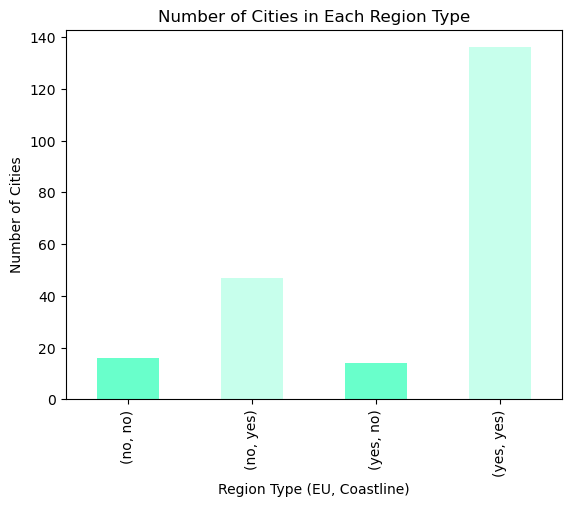

In [121]:
# your code
region_counts = df.groupby(['EU', 'coastline']).size()
region_counts.plot(kind = 'bar',color = ['#69ffcb', '#c7ffec'], xlabel = 'Region Type (EU, Coastline)', ylabel = 'Number of Cities', title = 'Number of Cities in Each Region Type')
plt.show()

2.Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

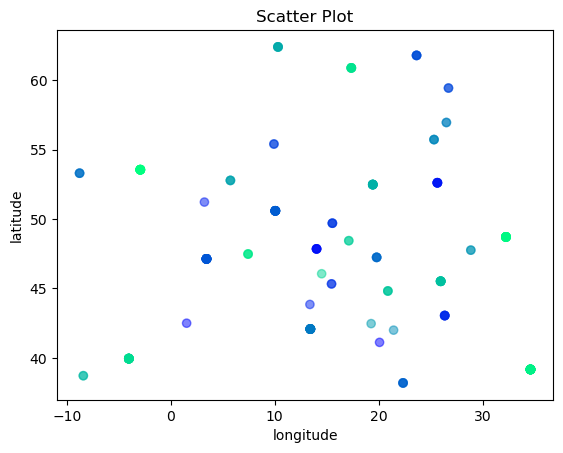

In [122]:
# your code
colors = pd.factorize(df['country'])[0]
plt.scatter(df['longitude'], df['latitude'], c = colors, cmap = 'winter', alpha = 0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Scatter Plot')
plt.show()

3.The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

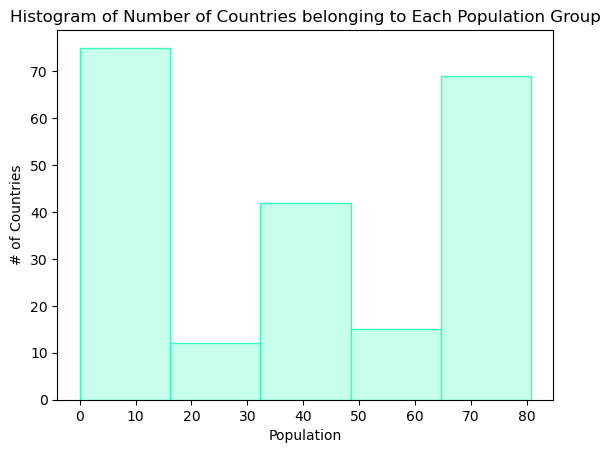

In [123]:

# your code
plt.hist(df['population'], bins = 5, color = '#c7ffec', edgecolor='#34ffb9')
plt.xlabel('Population')
plt.ylabel('# of Countries')
plt.title('Histogram of Number of Countries belonging to Each Population Group')
plt.show()

4.Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

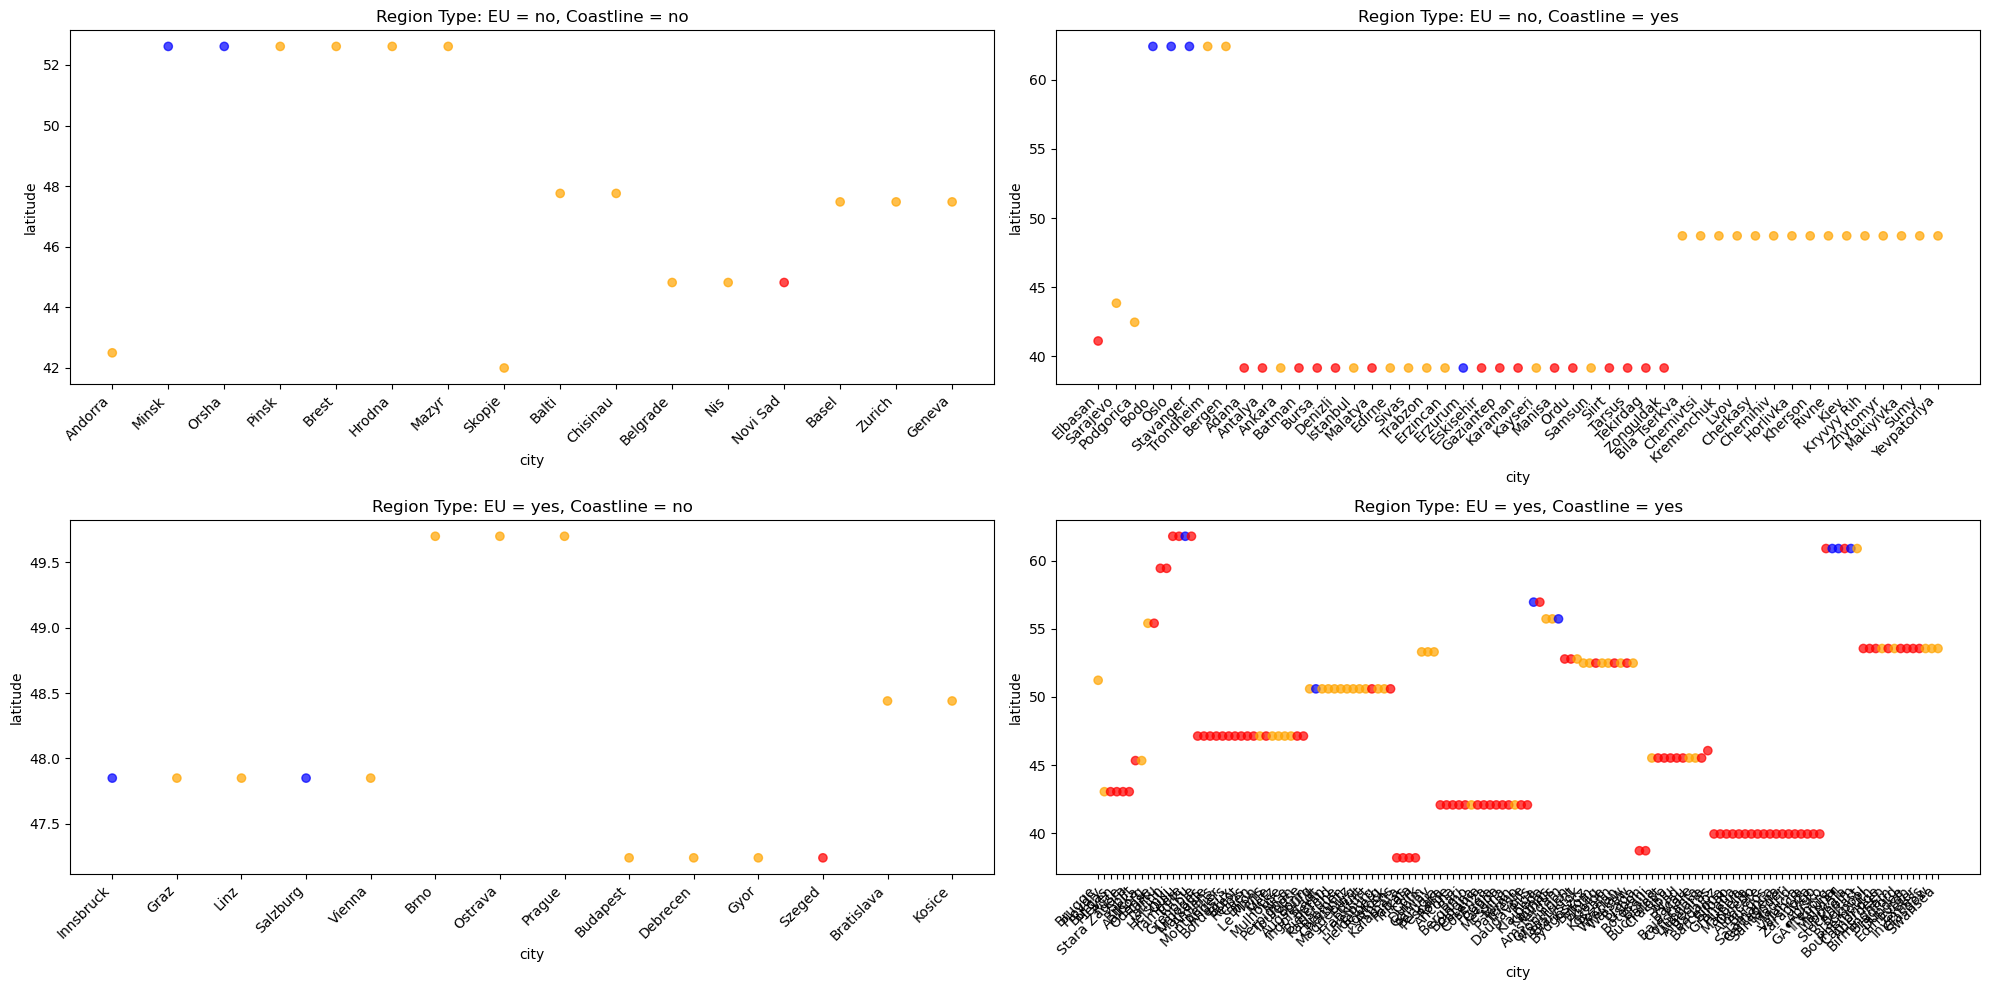

In [143]:
# your code
fig, axes = plt.subplots(2, 2,figsize=(20, 10))
region_types = df.groupby(['EU', 'coastline'])

for (eu, coast), plot in zip(region_types.groups.keys(), axes.flatten()):
    subset = df[(df['EU'] == eu) & (df['coastline'] == coast)]
    colors = pd.cut(subset['temperature'], bins = [-float('inf'), 6, 10, float('inf')], labels=['blue', 'orange', 'red'])
    
    plot.scatter(range(len(subset)), subset['latitude'], c = colors, alpha=0.7)
    plot.set_xticks(range(len(subset)))
    plot.set_xticklabels(subset['city'], rotation = 45, ha = 'right', fontsize = 10)
    plot.set_xlabel('city')
    plot.set_ylabel('latitude')
    plot.set_title(f'Region Type: EU = {eu}, Coastline = {coast}')

plt.tight_layout()
plt.show()